# Define atlas

In [6]:
# Retrieve destrieux parcellation in fsaverage5 space from nilearn
from nilearn import datasets

destrieux_atlas = datasets.fetch_atlas_surf_destrieux()
print(destrieux_atlas.keys())

# The parcellation is already loaded into memory
parcellation = destrieux_atlas['map_left']
# which ROI each vertex belongs to -> len = 10242
# numpy array with a value for each vertex of the surf_mesh

#----------------------------------------------------------------------------#
# Retrieve fsaverage5 surface dataset for the plotting background. 
# It contains the surface template as pial and inflated version and a sulcal depth maps which is used for shading
fsaverage = datasets.fetch_surf_fsaverage()

# The fsaverage dataset contains file names pointing to the file locations
print()
print("Fsaverage5 pial surface of left hemisphere is at: "
      f"{fsaverage['pial_left']}")
print("Fsaverage5 inflated surface of left hemisphere is at: "
      f"{fsaverage['infl_left']}")
print("Fsaverage5 sulcal depth map of left hemisphere is at: "
      f"{fsaverage['sulc_left']}")

dict_keys(['labels', 'map_left', 'map_right', 'description'])

Fsaverage5 pial surface of left hemisphere is at: /home/mwagner/.local/lib/python3.9/site-packages/nilearn/datasets/data/fsaverage5/pial_left.gii.gz
Fsaverage5 inflated surface of left hemisphere is at: /home/mwagner/.local/lib/python3.9/site-packages/nilearn/datasets/data/fsaverage5/infl_left.gii.gz
Fsaverage5 sulcal depth map of left hemisphere is at: /home/mwagner/.local/lib/python3.9/site-packages/nilearn/datasets/data/fsaverage5/sulc_left.gii.gz


We are now trying to do the same for the Desikan-Killiany atlas. The fsaverage space can stay the same. The main change is the parcellation.

- Parcellation: length = # vertices in mesh. Numbers = ROI. 

-> eventually want numbers (shading) as the p-value (or volume?)

In [8]:
import abagen
# https://abagen.readthedocs.io/en/stable/user_guide/parcellations.html#acceptable-parcellations

atlas_files = abagen.fetch_desikan_killiany()

# filepath to a NIFTI image containing the atlas data
atlas_img_filename = atlas_files['image']

# filepath to a CSV file containing extra information about the parcellation
atlas_info_filename = atlas_files['info']

print(f"Atlas ROIs are located at: {atlas_img_filename}")


Atlas ROIs are located at: /home/mwagner/bin/anaconda3/envs/mri_viz/lib/python3.9/site-packages/abagen/data/atlas-desikankilliany.nii.gz


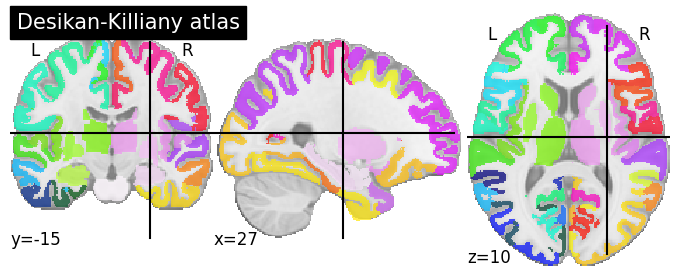

In [9]:
from nilearn import plotting

plotting.plot_roi(atlas_img_filename, title="Desikan-Killiany atlas")

/home/mwagner/.local/lib/python3.9/site-packages/nilearn/plotting/img_plotting.py:572: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  img = new_img_like(roi_img, data, affine=roi_img.affine)


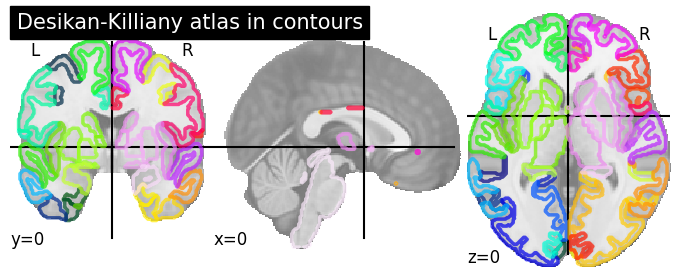

In [10]:
plotting.plot_roi(
    atlas_img_filename,
    view_type="contours",
    title="Desikan-Killiany atlas in contours",
)
plotting.show()

# Plotting in Nilearn

Plotting in nilearn


Surface mesh geometry (surf_mesh): contains the x,y,z coordinates of the mesh vertices and the indices (into coords) of the mesh faces

ROI map to display (roi_map): numpy array with a value for each vertex of the surf_mesh. The value at each vertex (one inside the ROI and zero inside ROI), or an integer giving the label number for atlases.

[29 27  8 ... 23 62 62]


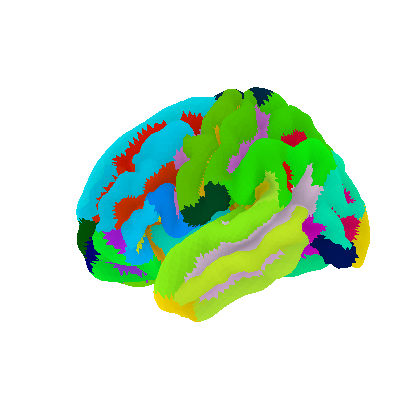

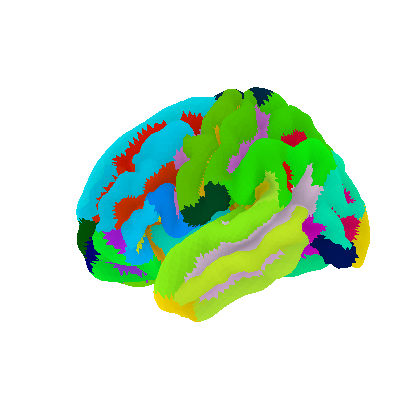

In [11]:
# Display Destrieux parcellation on fsaverage5 pial surface using nilearn
from nilearn import plotting

plotting.plot_surf_roi(
    fsaverage['pial_left'], 
    roi_map=parcellation,                   
    hemi='left', 
    view='lateral',
    bg_map=fsaverage['sulc_left'], 
    bg_on_data=True,
    darkness=.5
    )

In [14]:
# https://nilearn.github.io/dev/modules/generated/nilearn.plotting.plot_surf_roi.html#nilearn.plotting.plot_surf_roi
plotting.plot_surf_roi(
    fsaverage['pial_left'], 
    roi_map=atlas_img_filename,                   
    hemi='left', 
    view='lateral',
    bg_map=fsaverage['sulc_left'], 
    bg_on_data=True,
    darkness=.5
    )

/home/mwagner/bin/anaconda3/envs/mri_viz/lib/python3.9/site-packages/abagen/data/atlas-desikankilliany.nii.gz


ValueError: roi_map can only have one dimension but has 3 dimensions